In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

import math
import itertools
import random
from pprint import pprint as pp

%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
roster = pd.read_csv("../data/roster.csv")

In [4]:
house_col = "House 3"
event_col = "Event 3"

In [5]:
#roster

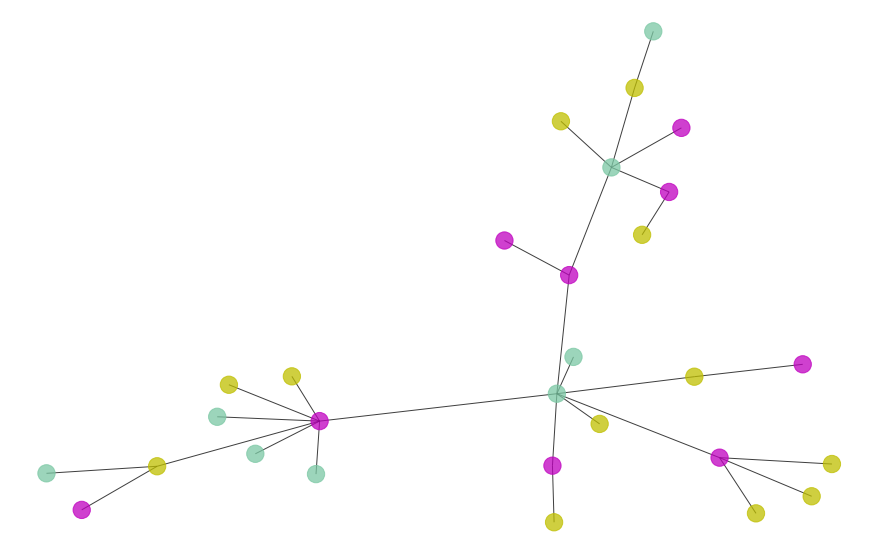

In [6]:
g = nx.from_pandas_edgelist(roster, 'Selector', 'Name')

g.remove_node(np.nan)
g.remove_node("(Jeff)")
g.remove_node("(Ken)")
g.remove_node("<Fen>")
g.remove_node("<Sav>")


nx.set_node_attributes(g,
                       roster[['Name',house_col]].set_index('Name').to_dict('index'))

def house_color(house):
    if house == "FP":
        return 'y'
    elif house == "TW":
        return '#7BC8A4'
    elif house == "RS":
        return 'm'
    else:
        return '#BBBBEE'

node_colors = [house_color(m[1][house_col]) for m in list(g.nodes(data=True))]

plt.figure(3,figsize=(12,7.5)) 
nx.draw(g,
        node_color=node_colors,
        font_size=14,
        alpha=0.75,
        with_labels=False)

In [7]:
pos = nx.drawing.layout.spring_layout(g)

In [8]:
fp = [x[0] for x in list(g.nodes(data=True)) if x[1][house_col] == "FP"]
tw = [x[0] for x in list(g.nodes(data=True)) if x[1][house_col] == "TW"]
rs = [x[0] for x in list(g.nodes(data=True)) if x[1][house_col] == "RS"]

In [9]:
#list(zip(rs,tw,fp))

In [10]:
attendees = roster[roster[event_col] > 0]['Name'].values

nx.set_node_attributes(g,{a : {'attending' : True} for a in attendees})

def remove_nonattendees(house):
    house_copy = house.copy()
    for member in house_copy:
        if member not in attendees:
            house.remove(member)
            
remove_nonattendees(fp)
remove_nonattendees(tw)
remove_nonattendees(rs)

In [11]:
## Remove Low House Commander:
#rs.remove('Suby')
#rs.remove('Nate')
#tw.remove('Daria')
#fp.remove('Sam')
#fp.remove('Brie')

In [12]:
present_edges = {}

for e in g.edges():
    if e[0] in attendees and e[1] in attendees:
        present_edges[e] = {'present' : True}

nx.set_edge_attributes(g,present_edges)


In [13]:
present_edges[e] = 1

In [14]:
def team_dist_score(team):
    ## team is a tuple of node labels
    ## Compute area of implied triangle using Heron's Formula
    
    a = nx.shortest_path_length(g,source=team[0],target=team[1]) + 1
    b = nx.shortest_path_length(g,source=team[1],target=team[2]) + 1
    c = nx.shortest_path_length(g,source=team[2],target=team[0]) + 1

    p = (a + b + c) / 2

    return math.log(math.sqrt(p * (p - a) * (p - b) * (p - c)))
        
def team_assignment_value(teams):
    return sum(map(team_dist_score,teams))

teams = list(zip(rs,tw,fp))
value = team_assignment_value(list(zip(rs,tw,fp)))

#print(teams)
#print(value)

[(('Ian', 'Pope', 'Ben'), 2.054924374379033),
 (('Suby', 'Daria', 'Brie'), 2.6127052978699745),
 (('Las', 'Ama', 'Sam'), 2.6127052978699745),
 (('Nate', 'Mar', 'Nata'), 2.5255286042975857)]
9.805863574416568


(array([  1.,   4.,  15.,  20.,  59., 120., 130.,  95.,  40.,  17.]),
 array([3.77180353, 4.37520953, 4.97861554, 5.58202154, 6.18542755,
        6.78883355, 7.39223956, 7.99564556, 8.59905156, 9.20245757,
        9.80586357]),
 <BarContainer object of 10 artists>)

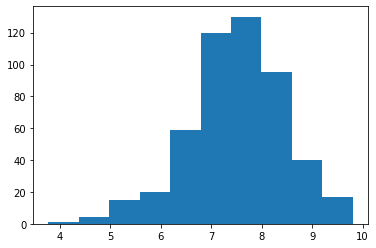

In [15]:
values = [value]

for i in range(500):
    new_teams = list(zip(random.sample(rs,len(rs)),
                         random.sample(tw,len(tw)),
                         random.sample(fp,len(fp))))
    
    new_value = team_assignment_value(new_teams)
    values.append(new_value)
    
    if new_value > value:
        teams = new_teams
        value = new_value
        
pp([(t, team_dist_score(t)) for t in teams])
print(value)

plt.hist(values)

In [16]:
for team in teams:
    #print(team)
    a = team[0]
    b = team[1]
    c = team[2]
    
    g.add_edge(a,b, team = True)
    g.add_edge(b,c, team = True)
    g.add_edge(c,a, team = True)

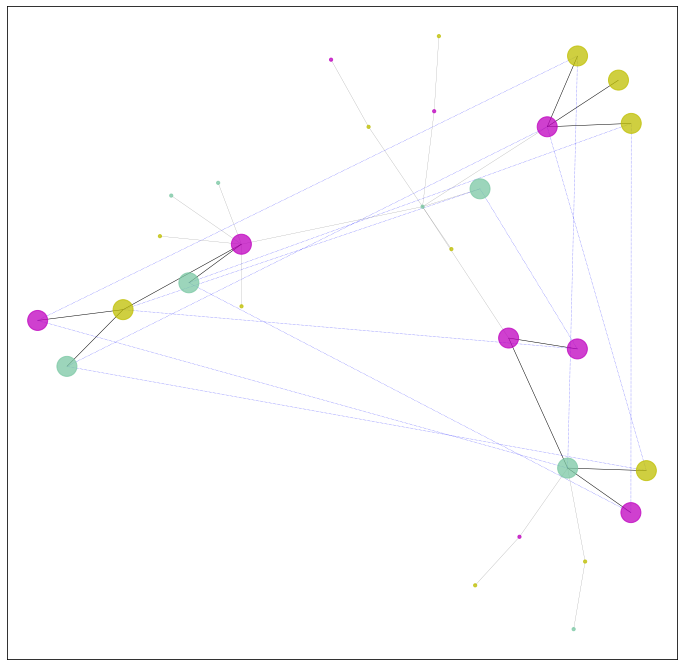

In [20]:
node_colors = [house_color(m[1]['House 3']) for m in list(g.nodes(data=True))]
node_size = [400 if 'attending' in m[1] else 10 for m in list(g.nodes(data=True))]

plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_nodes(
    g,
    pos,
    node_color=node_colors,
    node_size=node_size,
    #font_size=14,
    alpha=0.75,
    #with_labels=False
)

#nx.draw_networkx_labels(
#    g,
#    pos,
#    node_color=node_colors,
#    node_size=node_size,
    #font_size=14,
#    alpha=0.75,
#    with_labels=False)

nx.draw_networkx_edges(
    g,
    pos,
    edgelist = [e for e in g.edges(data=True) if 'present' in e[2] and e[2]['present']],
    width = .5
)

nx.draw_networkx_edges(
    g,
    pos,
    edgelist = [e for e in g.edges(data=True) if 'present' not in e[2] and 'team' not in e[2]],
    width = 0.2,
    alpha = .5
)


nx.draw_networkx_edges(
    g,
    pos,
    edgelist = [e for e in g.edges(data=True) if 'team' in e[2]],
    style = 'dotted',
    width = 0.5,
    alpha = 0.75,
    edge_color = 'blue'
)



In [ ]:
#[e for e in g.edges(data=True) if 'team' in e[2]]